In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
f = pd.read_csv("fandango_scrape.csv")

In [6]:
f = pd.DataFrame(f)

In [7]:
f.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [8]:
f.info

<bound method DataFrame.info of                                      FILM  STARS  RATING  VOTES
0             Fifty Shades of Grey (2015)    4.0     3.9  34846
1                   Jurassic World (2015)    4.5     4.5  34390
2                  American Sniper (2015)    5.0     4.8  34085
3                        Furious 7 (2015)    5.0     4.8  33538
4                       Inside Out (2015)    4.5     4.5  15749
..                                    ...    ...     ...    ...
499                      Valiyavan (2015)    0.0     0.0      0
500            WWE SummerSlam 2015 (2015)    0.0     0.0      0
501       Yagavarayinum Naa Kaakka (2015)    0.0     0.0      0
502  Yesterday, Today and Tomorrow (1964)    0.0     0.0      0
503                         Zarafa (2012)    0.0     0.0      0

[504 rows x 4 columns]>

<Axes: xlabel='VOTES', ylabel='RATING'>

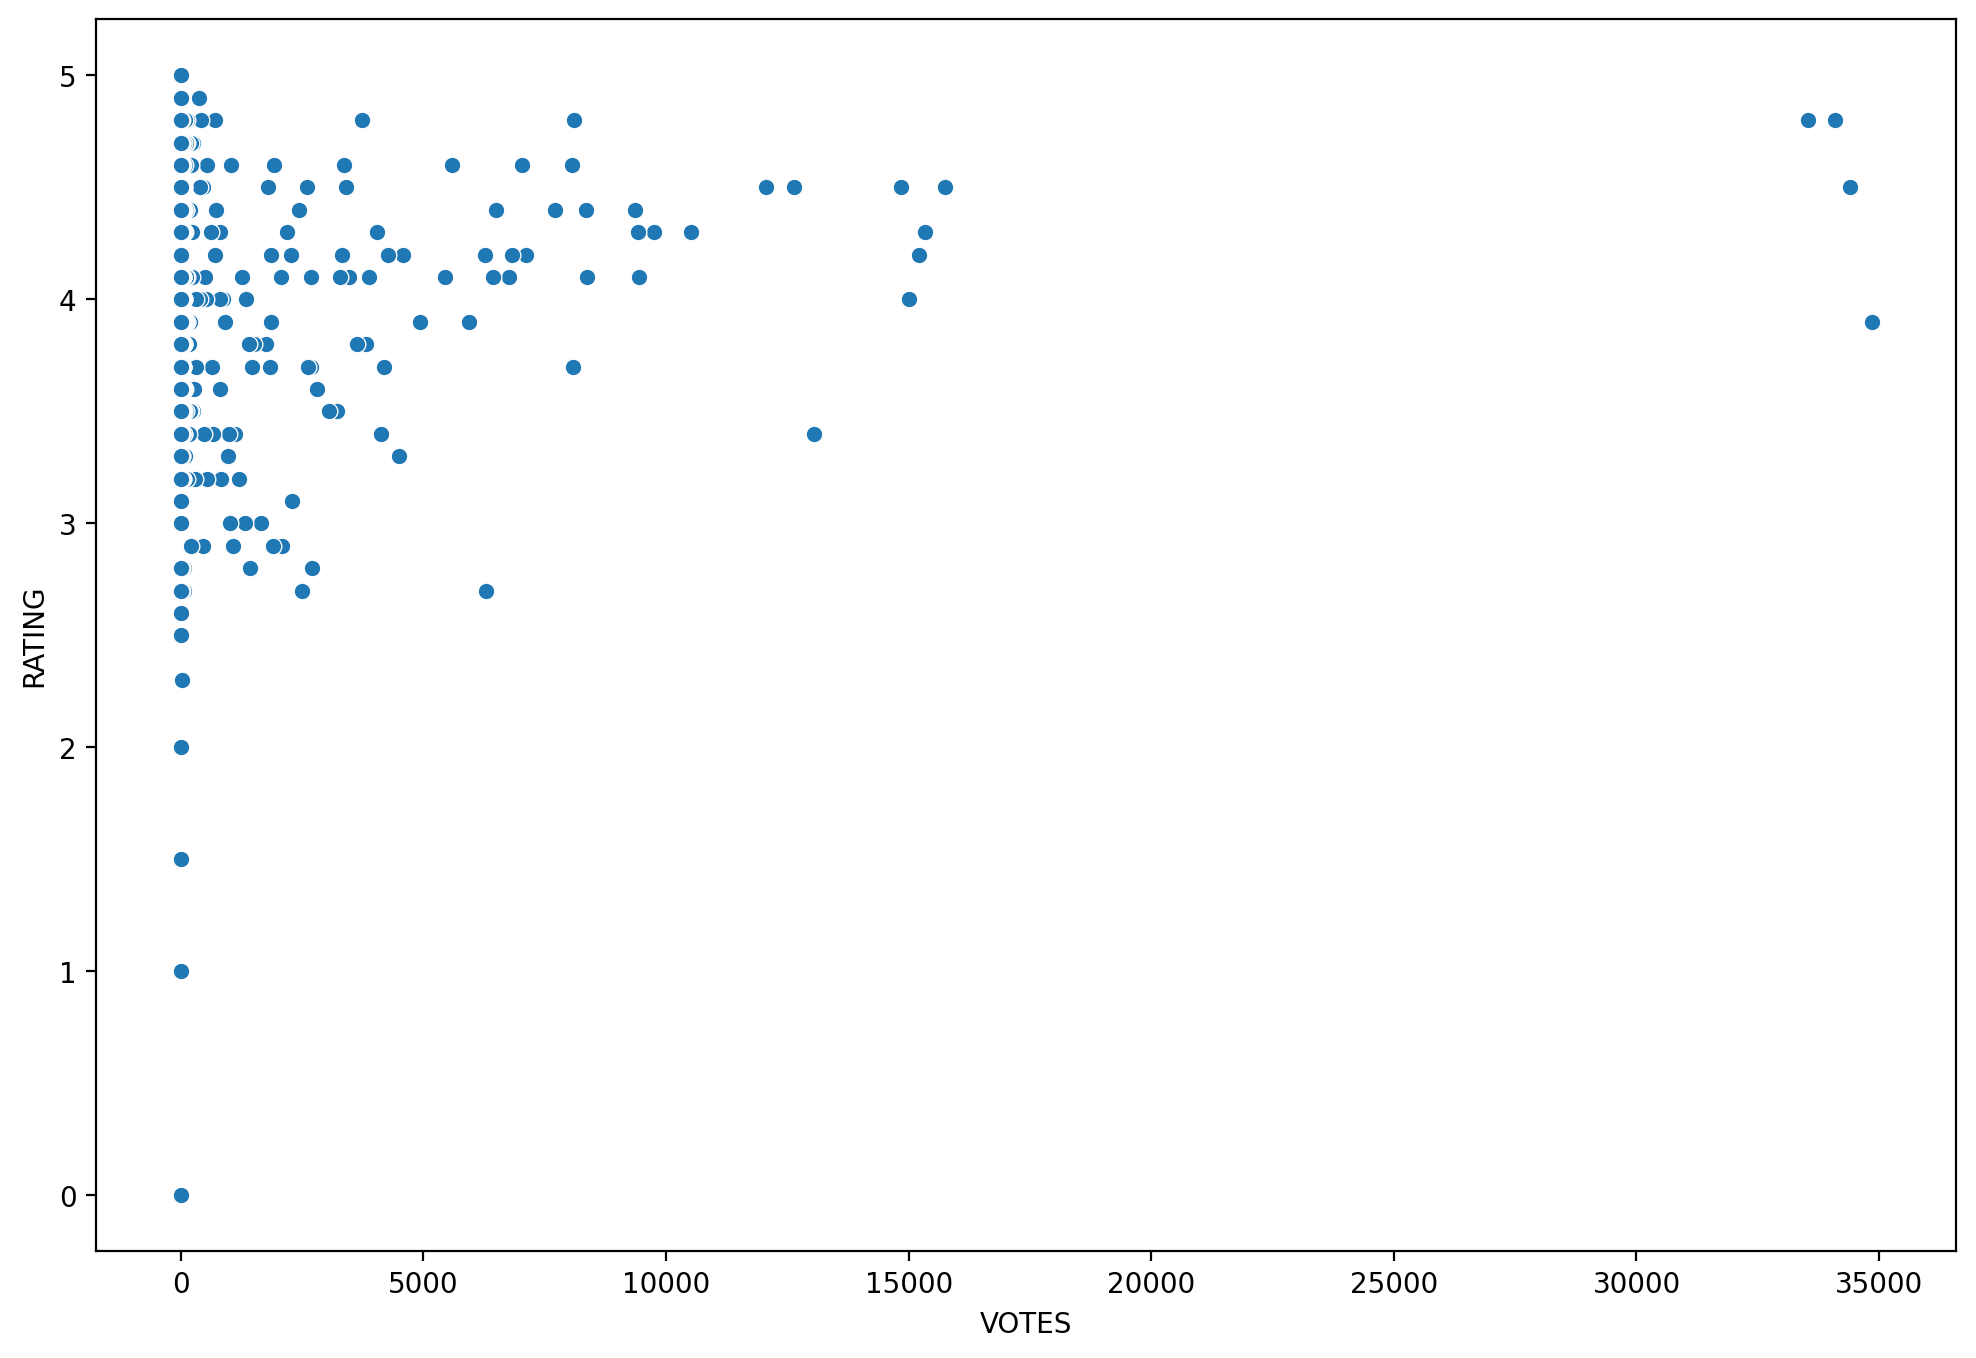

In [9]:
plt.figure(figsize=(12,8), dpi=200)

sns.scatterplot(data=f, x='VOTES', y='RATING')

In [10]:
f.drop("FILM", axis=1).corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [11]:
f['YEAR'] = f['FILM'].str.extract(r'\((\d{4})\)')


In [12]:
f.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [13]:
f.groupby("YEAR").size()

YEAR
1964      1
2012      1
2014     24
2015    477
2016      1
dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

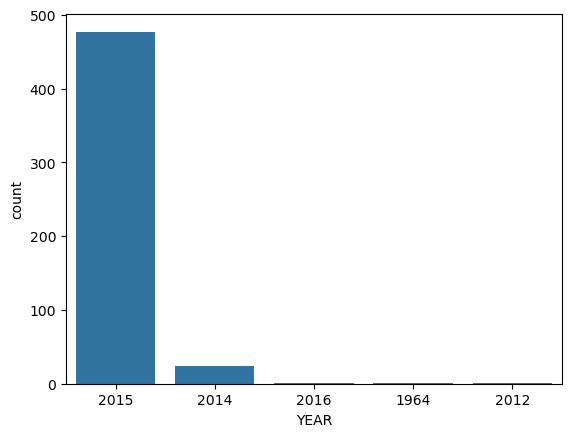

In [14]:
sns.countplot(data=f, x='YEAR')

In [15]:
f.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [18]:
zero_votes = f['VOTES'] == 0
zero_votes.sum()

69

In [19]:
fan_reviewed = f[f['VOTES']>0]